## A Simple Transformer Model and Its Application on a Small Dataset

Make sure you have installed pytorch in the current environment. Instructions for pytorch installation: https://pytorch.org/get-started/locally/

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import math

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.


In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 319kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.41MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.2MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.


In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Here, we use the FashionMNIST dataset. Each image in the dataset is a 28x28 pixel square.
# The images are grayscale, hence the channel number (C) is 1.
# To simplify our description, we can think of one image as a sequence of fixed-length 28, and inside each sequence, the vector of each element is of length 28.

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Read more about [loading data in PyTorch](data_tutorial.html).

Visualize your dataset

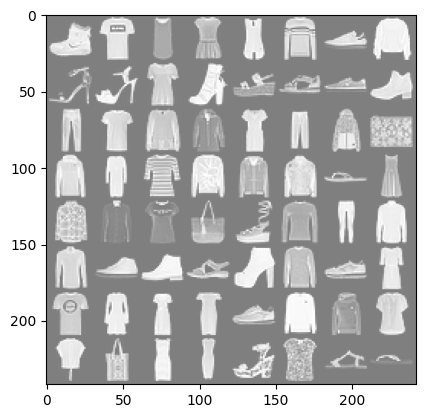

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

------------------------------------------------------------------------


Creating A Transformer Model
===============

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the GPU if available.


In [6]:
# Get cpu or gpu for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### Fill your code in the forward function

In [7]:
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, input_dim, emb_dim, num_heads):  # The initialization steps that will be done when we create a MultiHeadSelfAttention object.
        super().__init__()  # Initialize the nn.Module object.
        self.emb_dim = emb_dim  # embedding dimension, the length of each embedding vector
        self.num_heads = num_heads  # the number of attention heads
        self.head_dim = emb_dim // num_heads  # the length of embedding vector for each attention head

        assert self.head_dim * num_heads == emb_dim, "Embedding dimension must be divisible by the number of heads"

        # nn.Linear(input_dim, emb_dim) is a linear layer, with the input dimension as input_dim
        # and the output dimension also as emb_dim,
        # equivalent to a matrix of size input_dimension (height) * output_dimension (width),
        # able to transform an input vector of length input_dimension to an embedding vector of length output_dimension
        self.query = nn.Linear(input_dim, emb_dim)
        self.key = nn.Linear(input_dim, emb_dim)
        self.value = nn.Linear(input_dim, emb_dim)
        # self.out is a Linear layer that transforms each embedding vector to an output embedding vector (of the same length).
        self.out = nn.Linear(emb_dim, emb_dim)

    def forward(self, x): # The steps that will be done when we call the created MultiHeadSelfAttention object.
        # 'x' contains the input data, a bunch of input vectors.
        #  In the case of this notebook, x is a tensor of shape [batch_size, input_dimension], meaning 'batch_size' vectors, with length of each vector being 'input_dimension'.
        batch_size = x.shape[0]  # The number of input vectors in the input batch.



        Q = self.query(x)# Fill the code here
        K = self.key(x)
        V = self.value(x)
        ## Learn to write the attention mechanism with python

        # use Linear layer compute Q, K, V

        # incomplete Line 1: shape of Q: [batch_size, sequence_length, emb_dim]
        # incomplete Line 2: shape of K: [batch_size, sequence_length, emb_dim]
        # incomplete Line 3: shape of V: [batch_size, sequence_length, emb_dim]

        # incomplete Line 4: Split by heads
        Q_ = Q.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        # We have seen that emb_dim = num_heads * head_dim,
        # hence the last dimension of Q (which has the size of emb_dim) can be splitted into two dimensions [num_heads, head_dim]
        # The above line changes the shape of Q from [batch_size, emb_dim] to [batch_size, 1, num_heads, head_dim],
        # and then switch the 1-th and 2-th (counting from 0) dimensions,
        # finally the shape of Q becomes [batch_size, num_heads, sequence_length, head_dim]
        K_ = K.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        V_ = V.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        # incomplete Line 7: Scaled dot-product attention
        energy = torch.matmul(Q_, K_.transpose(-1, -2)) / math.sqrt(self.head_dim)
        # In the above line, we transpose K_ from the shape [batch_size, num_heads, sequence_length, head_dim] into the shape [batch_size, num_heads, head_dim, sequence_length]
        # Hence the last two dimensions of Q_ (of shape [sequence_length, head_dim]) and transposed K_ (of shape [head_dim, sequence_length]) can perform matrix multiplication.
        # The result of math.sqrt(self.head_dim) is a scalar value.
        # The shape of the torch.matmul result (and also the shape of 'energy') is [batch_size, num_heads, sequence_length, sequence_length]

        attention = F.softmax(energy, dim=-1)
        out = torch.matmul(attention, V_)
        self.attention_map = attention

        # Concatenate all heads and transform to output space
        out = out.transpose(1, 2).contiguous().view(batch_size, -1, self.emb_dim)  # Take the embedding vector of the whole sequence as the average of embedding vectors for all elements in the sequence.
        out = out.sum(dim=1) / out.shape[1]  # Take the embedding vector of the entire sequence (the entire image) as the average of embedding vectors for all elements in the sequence.
        out = self.out(out)  # Perform a linear transformation on the embedding vectors.

        return out

In [8]:
# Define model
class TransformerEncoder(nn.Module):
    def __init__(self, input_dim, emb_dim, num_heads):  # The initialization steps that will be done when we create a TransformerEncoder object.
        super().__init__()  # Initialize the nn.Module object.
        self.attention = MultiHeadSelfAttention(input_dim, emb_dim, num_heads)  # Create a MultiHeadSelfAttention object, which will be used in "def forward".
        self.feed_forward = nn.Sequential(  # Create a Sequential object, consisting of two Linear layer and a ReLU function between them.
            nn.Linear(emb_dim, emb_dim * 4),
            nn.ReLU(),
            nn.Linear(emb_dim * 4, 10)
        )

    def forward(self, x):  # The steps that will be done when we call the created TransformerEncoder object.
        # Attention
        x_att = self.attention(x)  # call the MultiHeadSelfAttention object we created, with the flattened x as input

        # Feed Forward
        out = self.feed_forward(x_att)
        # The above line calls the Sequential object we created, with x_att as input,
        # x_att will go through a Linear layer, a ReLU function and another Linear layer.
        return out

# Create the model, a TransformerEncoder object, using TransformerEncoder.__init__(self, input_dim=28, emb_dim=32, num_heads=4),
# and put the model to the device we set (cpu or gpu).
model = TransformerEncoder(28, 32, 4).to(device)
# Print the information of the TransformerEncoder object we created.
print(model)

TransformerEncoder(
  (attention): MultiHeadSelfAttention(
    (query): Linear(in_features=28, out_features=32, bias=True)
    (key): Linear(in_features=28, out_features=32, bias=True)
    (value): Linear(in_features=28, out_features=32, bias=True)
    (out): Linear(in_features=32, out_features=32, bias=True)
  )
  (feed_forward): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


Read more about [building neural networks in
PyTorch](buildmodel_tutorial.html).


------------------------------------------------------------------------


Optimizing the Model Parameters
===============================

To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.


In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Let the model enter the training mode.
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation, to update the weights (parameters) of the model.
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model\'s performance against the test dataset to
ensure it is learning.


In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Let the model enter the evaluation mode.
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


In [12]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306708  [   64/60000]
loss: 2.302586  [ 6464/60000]
loss: 2.311843  [12864/60000]
loss: 2.313471  [19264/60000]
loss: 2.290632  [25664/60000]
loss: 2.296245  [32064/60000]
loss: 2.296287  [38464/60000]
loss: 2.292610  [44864/60000]
loss: 2.302399  [51264/60000]
loss: 2.297462  [57664/60000]
Test Error: 
 Accuracy: 10.2%, Avg loss: 2.297019 

Epoch 2
-------------------------------
loss: 2.297998  [   64/60000]
loss: 2.295651  [ 6464/60000]
loss: 2.301039  [12864/60000]
loss: 2.303913  [19264/60000]
loss: 2.284750  [25664/60000]
loss: 2.286817  [32064/60000]
loss: 2.290547  [38464/60000]
loss: 2.284815  [44864/60000]
loss: 2.292624  [51264/60000]
loss: 2.289284  [57664/60000]
Test Error: 
 Accuracy: 16.1%, Avg loss: 2.287928 

Epoch 3
-------------------------------
loss: 2.289183  [   64/60000]
loss: 2.288281  [ 6464/60000]
loss: 2.289978  [12864/60000]
loss: 2.294384  [19264/60000]
loss: 2.277307  [25664/60000]
loss: 2.276629  [32064/600

Read more about [Training your model](optimization_tutorial.html).


------------------------------------------------------------------------


This model can now be used to make predictions.


In [13]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()  # Let the model enter the evaluation mode.
with torch.no_grad():
    counts = 0
    true_counts = 0
    for item in test_data:
        x, y = item[0], item[1]
        x = x.to(device)
        pred = model(x)  # pred is a tensor of shape [1, 10], 1 is the test batch size, 10 is the number of classes. The 10 values contain the predicted probability of the 10 classes.
        predicted, actual = classes[pred[0].argmax(0)], classes[y]  # pred[0].argmax(0) returns the index of the maximum value in pred[0].
        if predicted == actual:
            true_counts += 1
        counts += 1
        # print(f'Predicted: "{predicted}", Actual: "{actual}"')
    print()
    print(f"Test data size: {counts}")
    print(f"Accuracy: {true_counts/counts}")  # Fill the code here


Test data size: 10000
Accuracy: 0.3496


Read more about [Saving & Loading your
model](saveloadrun_tutorial.html).


## Self-Attention Visualization

In this section, we will visualize the multi-head self-attention mechanism to see how the attention is computed.

Step1: Get the attention map

From the code above, we have already added a property `attention_map` to the MultiHeadSelfAttention object. We can get the attention map by calling the attention object with the input data.

In [14]:
# make sure the execution of the forward function is done before getting the attention map

attention_map = model.attention.attention_map

print(attention_map.shape)

torch.Size([1, 4, 28, 28])


Step2: Visualize the attention map using Matplotlib

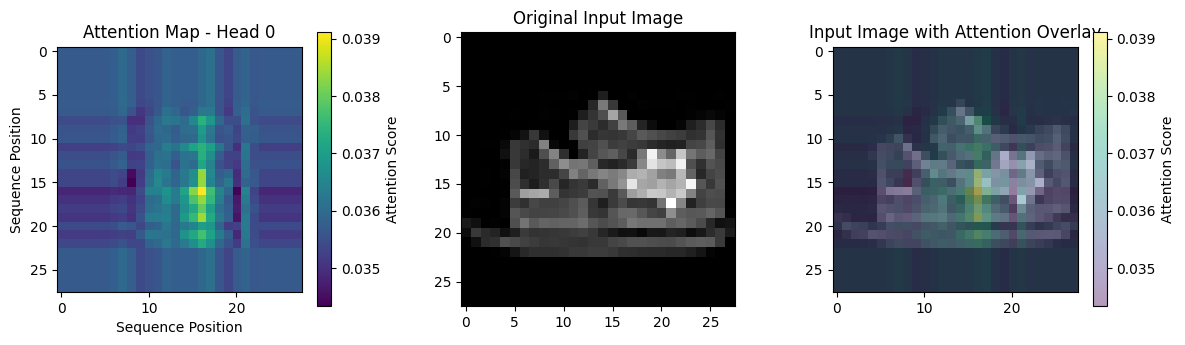

In [17]:
# Visualize the saved attention map and input image with attention overlay
import matplotlib.pyplot as plt

# Create a figure with 3 subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5))

# Plot the attention heatmap of the first head and the first batch, to get a 28x28 attention map
attention = attention_map[0, 0, :, :].detach().cpu().numpy()

im1 = ax1.imshow(attention, cmap='viridis')
ax1.set_title('Attention Map - Head 0')
ax1.set_xlabel('Sequence Position')
ax1.set_ylabel('Sequence Position')
fig.colorbar(im1, ax=ax1, label='Attention Score')

# Plot original input image
input_image =  x[0].squeeze().detach().cpu().numpy() s
im2 = ax2.imshow(input_image, cmap='gray')
ax2.set_title('Original Input Image')

# Plot input image with attention overlay
# Reshape attention to match image dimensions (28x28)
attention_reshaped = attention.reshape(28, 28)
# Plot image with attention overlay
im3 = ax3.imshow(input_image, cmap='gray')
im3.set_alpha(0.9)
im3_attention = ax3.imshow(attention_reshaped, cmap='viridis', alpha=0.4)
ax3.set_title('Input Image with Attention Overlay')
fig.colorbar(im3_attention, ax=ax3, label='Attention Score')

plt.tight_layout()
plt.show()

Step3: Understand the attention map

The shape of the attention map is [batch_size, num_heads, sequence_length, sequence_length]. we visualize the attention map of the first batch and the first head.  You can also try other batches and heads.

Specifically, the map size is 28x28, meaning each pixel here represents the attention score between two positions in the sequence. Here 28 is the input_dim of the MultiHeadSelfAttention object, which is the length of each input vector.  

From this visualization, we find that the attention is focusing on the center of the image. This attention map works as a interpretability tool to see which pixels are attended to in the input image.